<a href="https://colab.research.google.com/github/Fragoa/convolutional-networks-lenet-mnist/blob/main/LeeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape to (batch, height, width, channels)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Pad the images from 28x28 to 32x32 (2 pixels on each side)
train_images = tf.pad(train_images, paddings=[[0,0], [2,2], [2,2], [0,0]], mode='CONSTANT')
test_images = tf.pad(test_images, paddings=[[0,0], [2,2], [2,2], [0,0]], mode='CONSTANT')

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Display the shape of the loaded and preprocessed data
print("Shape of training images:", train_images.shape)  # should be (60000, 32, 32, 1)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)        # should be (10000, 32, 32, 1)
print("Shape of test labels:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 32, 32, 1)
Shape of training labels: (60000, 10)
Shape of test images: (10000, 32, 32, 1)
Shape of test labels: (10000, 10)


In [6]:
def create_lenet():
    model = models.Sequential()

    # Input Layer: 32x32 grayscale image
    model.add(layers.Input(shape=(32, 32, 1)))

    # C1: Convolutional Layer (6 filters, 5x5 kernel, tanh activation)
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'))

    # S2: Average Pooling Layer (2x2, stride=2, tanh activation)
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Activation('tanh'))

    # C3: Convolutional Layer (16 filters, 5x5 kernel, tanh activation)
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))

    # S4: Average Pooling Layer (2x2, stride=2, tanh activation)
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Activation('tanh'))

    # C5: Convolutional Layer (120 filters, 5x5 kernel, tanh activation)
    model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'))

    # Flatten the output to feed into the dense layers
    model.add(layers.Flatten())

    # F6: Fully Connected Layer (84 units, tanh activation)
    model.add(layers.Dense(units=84, activation='tanh'))

    # Output Layer: 10 units (for classification), softmax activation
    model.add(layers.Dense(units=10, activation='softmax'))

    return model


In [7]:
lenet_model = create_lenet()

lenet_model.summary()

lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
epochs = 20
batch_size = 128

history = lenet_model.fit(train_images, train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2) # Use 20% of training data for validation

test_loss, test_accuracy = lenet_model.evaluate(test_images, test_labels, verbose=0)

print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.8069 - loss: 0.6653 - val_accuracy: 0.9485 - val_loss: 0.1710
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.9519 - loss: 0.1624 - val_accuracy: 0.9706 - val_loss: 0.0989
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9712 - loss: 0.0944 - val_accuracy: 0.9758 - val_loss: 0.0795
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9789 - loss: 0.0677 - val_accuracy: 0.9801 - val_loss: 0.0641
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9854 - loss: 0.0504 - val_accuracy: 0.9810 - val_loss: 0.0615
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9865 - loss: 0.0430 - val_accuracy: 0.9804 - val_loss: 0.0629
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9814 - val_loss: 0.0578
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9909 - loss: 0.0307 - 

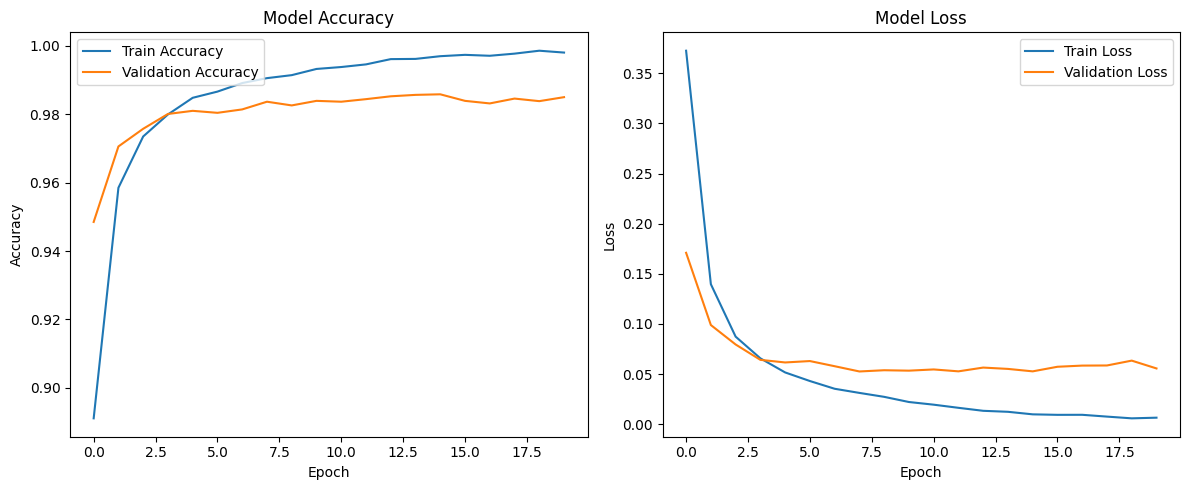

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


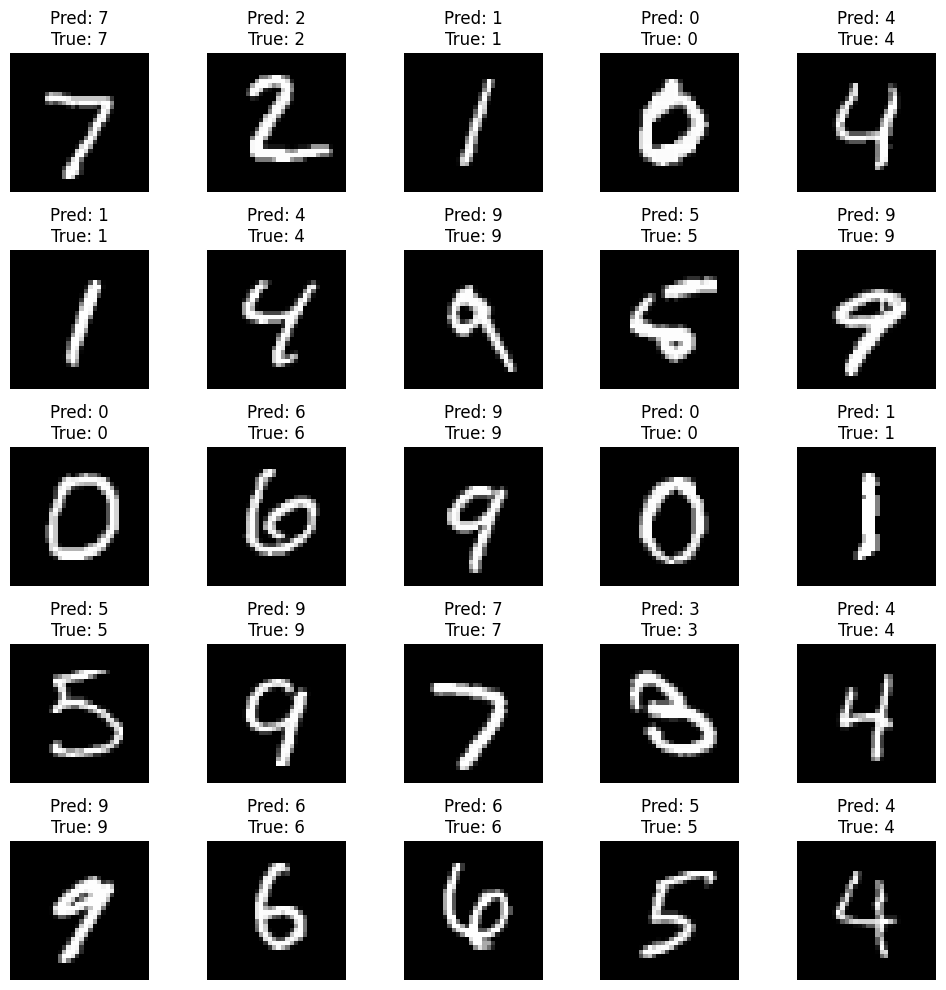

In [12]:
test_images_np = test_images.numpy() if isinstance(test_images, tf.Tensor) else test_images

predictions = lenet_model.predict(test_images_np[:25])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels[:25], axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_np[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()